In [55]:
#ROSA DE VIENTOS
import plotly.express as px
from functions_SIMA import *

inputs = {
    "year initial": 2015,
    "year final": 2020,
    "path data": "../Archivos/",
    "stations": ["NOROESTE", "NORESTE"],
     "WSR_SIMA.csv"}

WSR=SIMA_data(inputs["year initial"], inputs["year final"], inputs["stations"])
WDR=SIMA_data(inputs["year initial"], inputs["year final"], inputs["stations"])

WSR.read_data("WSR_SIMA.csv", inputs["path data"])
#WSR.Clean_data()
WDR.read_data("WDR_SIMA.csv", inputs["path data"])
#WDR.Clean_data()

WindData=  { 'Direction': WDR.data[station],  'Speed': WSR.data[station] }
Wdf = pd.DataFrame(WindData, columns = ['Direction', 'Speed'])
Wdf.groupby(by=['Direction']).mean()

,Speed
Direction,
0.00,NaN
0.46,0.460000
1.00,5.840000
2.00,4.383333
3.00,6.454545
...,...
356.00,6.557895
357.00,6.156250
358.00,4.264706


In [44]:
df = px.data.wind()
fig = px.bar_polar(df, r="frequency", theta="direction",
                   color="strength", template="plotly",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

In [45]:
df

,direction,strength,frequency
0,N,0-1,0.5
1,NNE,0-1,0.6
2,NE,0-1,0.5
3,ENE,0-1,0.4
4,E,0-1,0.4
...,...,...,...
123,WSW,6+,0.1
124,W,6+,0.9
125,WNW,6+,2.2
126,NW,6+,1.5


In [6]:
from functions_SIMA import *

inputs = {
    "year initial": 2015,
    "year final": 2019,
    "path data": "../Archivos/",
    "stations": ["NOROESTE", "NORESTE"] }

PM10=SIMA_data(inputs["year initial"],
                  inputs["year final"],
                  inputs["stations"],
                  "PM10")
PM_10.read_data(inputs["path data"])

PM10_hour=PM10=SIMA_data(inputs["year initial"],
                  inputs["year final"],
                  inputs["stations"],
                  "PM10_hour")
                  
AOD_1=pd.read_csv("../Archivos/AOD_OMI_1_clean.csv")
AOD_025=pd.read_csv("../Archivos/AOD_OMI_025_clean.csv")

,Dates,354nm,388nm,500nm
0,150101,NaN,NaN,NaN
1,150102,NaN,NaN,NaN
2,150103,NaN,NaN,NaN
3,150104,NaN,NaN,NaN
4,150105,NaN,NaN,NaN
...,...,...,...,...
2185,201227,NaN,NaN,NaN
2186,201228,NaN,NaN,NaN
2187,201229,NaN,NaN,NaN
2188,201230,NaN,NaN,NaN


In [83]:
#FUNCIONES!!
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

def obtain_month_names(months):
    names = []
    for month in months:
        date = datetime.date(2020, month, 1)
        names.append(date.strftime("%b"))
    return names

class SIMA_data:
    def __init__(self, stations, file):
        self.stations = stations
        self.file = file
    
    def clean_data(self):
        for key in self.data.keys():
            if not key in self.stations and not key in ["Datetime"]:
                self.data = self.data.drop(key, 1)

    def read_data_SIMA(self,path_data):
        self.data=pd.read_csv(path_data + self.file + '_SIMA.csv')
        self.data['Hours'] = self.data['Hours'].astype(str).str.zfill(2)
        self.data['Datetime'] = self.data["Dates"] + ' ' + self.data['Hours']
        self.data['Datetime']=pd.to_datetime(self.data['Datetime'])
        self.data.index=self.data['Datetime']
        self.data=self.data.drop(['Dates','Hours','Datetime'], axis=1)

    def calc_month_mean(self,station,year_i,year_f):
        self.years = [year for year in range(year_i, year_f+1)]
        self.month_mean = pd.DataFrame(columns=self.years,index=[i for i in range(1,13)])
        i=0
        for year in self.years:
            for month in range(1, 13):
                self.month_mean[year][month] = self.data.resample("MS").mean()[station][i]
                i=i+1

    def calc_month_sum(self,station,year_i,year_f):
        self.years = [year for year in range(year_i, year_f+1)]
        self.month_sum = pd.DataFrame(columns=self.years,index=[i for i in range(12)])
        i=0
        for year in self.years:
            for month in range(1, 13):
                self.month_sum[year][month] = self.data.resample("MS").sum()[station][i]
                i=i+1

    def cut_year(self, date_i, date_f):
        self.section = self.data.loc[(self.data.index >= date_i) &
                                          (self.data.index < date_f)] 

class AOD_OMI_data:
    def __init__(self, wavelen, res):
        self.wavelen = wavelen
        self.res = res

    def read_data(self,path_data):
        self.data=pd.read_csv(path_data + 'AOD_OMI_' + self.res + '_clean.csv',index_col=0)
        self.data.index=pd.to_datetime(self.data.index,format='%y%m%d')
        for key in self.data.keys():
            if not key in self.wavelen and not key in ["Dates"]:
                self.data = self.data.drop(key, 1)
       
    def calc_month_mean(self,year_i,year_f):
        self.years = [year for year in range(year_i, year_f+1)]
        self.month_mean = pd.DataFrame(columns=self.years,index=[i for i in range(12)])
        i=0
        for year in self.years:
            for month in range(1, 13):
                self.month_mean[year][month - 1] = self.data.resample("MS").mean()[self.wavelen][i]
                i=i+1
                
    def cut_year(self, date_i, date_f):
        self.section = self.data.loc[(self.data.index >= date_i) &
                                          (self.data.index < date_f)] 

In [20]:
inputs = {"year i": 2015,
          "year f": 2020,
          "path data": "../Archivos/",
          "stations": ["NOROESTE", "NORESTE"],
          #AOD specification
          "wavelen": ["500nm","483.5nm"], 
          "resolution": ["1","025"]}
    
PM10=SIMA_data(inputs['stations'],'PM10')
PM10.read_data_SIMA(inputs['path data'])
PM10.clean_data()

RAINF=SIMA_data(inputs['stations'],'RAINF')
RAINF.read_data_SIMA(inputs['path data'])
RAINF.clean_data()

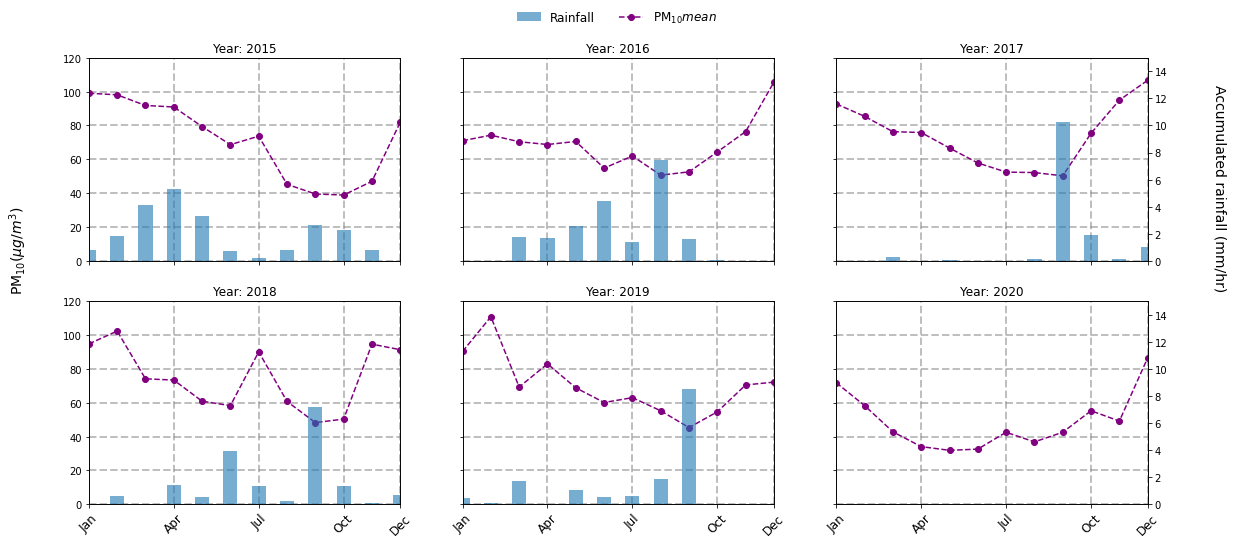

In [21]:
#NOROESTE
st=0
PM10.calc_month_mean(inputs['stations'][st],inputs['year i'],inputs['year f'])
RAINF.calc_month_sum(inputs['stations'][st],inputs['year i'],inputs['year f'])

choose_months = np.arange(1, 11, 3)
choose_months = np.append(choose_months, 12)
month_names = obtain_month_names(choose_months)
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(18, 8))
plt.subplots_adjust(left=0.083, right=0.9, top=0.9)
axs = np.reshape(axs, 6)
for year, ax in zip(PM10.years, axs):
    ax2 = ax.twinx()
    ax.set_xticks(choose_months)
    ax.set_xticklabels(month_names, rotation=45, fontsize=12)
    ax.set_xlim(1, 12)
    ax.set_ylim(0, 120)
    ax.set_title("Year: {}".format(year))
    ax.grid(ls="--", color="grey", alpha=0.5, lw=2)
    # Ploteo del valor de PM10
    ax.plot(np.arange(1, 13), PM10.month_mean[year], ls="--", color="purple", marker="o", label="PM$_{10}  mean$")
    ax2.set_ylim(0, 15)
    if not ax in [axs[2], axs[5]]:
        ax2.set_yticks(([]))
    # Ploteo del valor de lluvias
    ax2.bar(np.arange(1, 13), RAINF.month_sum[year], 0.5, label="Rainfall",alpha=0.6)
fig.text(0.02, 0.5, "PM$_{10}  (\mu g/m^3)$", rotation=90, fontsize=14)
fig.text(0.95, 0.5, "Accumulated rainfall (mm/hr)", rotation=-90, fontsize=14)
lines, labels = fig.axes[-1].get_legend_handles_labels()
lines.append(fig.axes[0].get_legend_handles_labels()[0][0])
labels.append(fig.axes[0].get_legend_handles_labels()[1][0])
fig.legend(lines, labels, loc="upper center",
        ncol=5, frameon=False, fontsize=12)
plt.show()

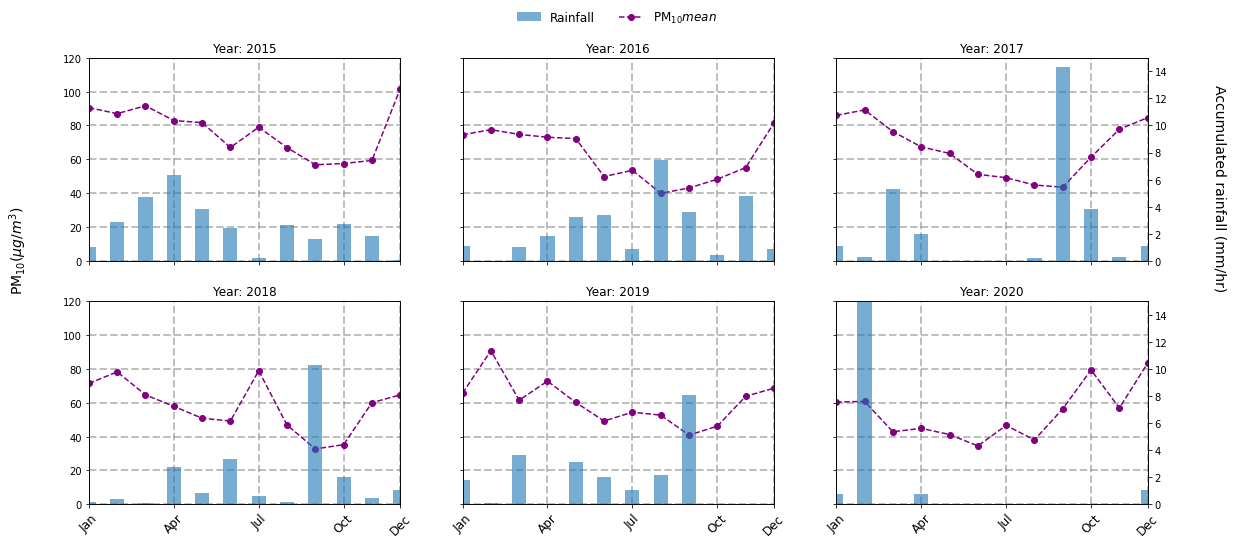

In [22]:
#NORESTE
st=1
PM10.calc_month_mean(inputs['stations'][st],inputs['year i'],inputs['year f'])
RAINF.calc_month_sum(inputs['stations'][st],inputs['year i'],inputs['year f'])

choose_months = np.arange(1, 11, 3)
choose_months = np.append(choose_months, 12)
month_names = obtain_month_names(choose_months)
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(18, 8))
plt.subplots_adjust(left=0.083, right=0.9, top=0.9)
axs = np.reshape(axs, 6)
for year, ax in zip(PM10.years, axs):
    ax2 = ax.twinx()
    ax.set_xticks(choose_months)
    ax.set_xticklabels(month_names, rotation=45, fontsize=12)
    ax.set_xlim(1, 12)
    ax.set_ylim(0, 120)
    ax.set_title("Year: {}".format(year))
    ax.grid(ls="--", color="grey", alpha=0.5, lw=2)
    # Ploteo del valor de PM10
    ax.plot(np.arange(1, 13), PM10.month_mean[year], ls="--", color="purple", marker="o", label="PM$_{10}  mean$")
    ax2.set_ylim(0, 15)
    if not ax in [axs[2], axs[5]]:
        ax2.set_yticks(([]))
    # Ploteo del valor de lluvias
    ax2.bar(np.arange(1, 13), RAINF.month_sum[year], 0.5, label="Rainfall",alpha=0.6)
fig.text(0.02, 0.5, "PM$_{10}  (\mu g/m^3)$", rotation=90, fontsize=14)
fig.text(0.95, 0.5, "Accumulated rainfall (mm/hr)", rotation=-90, fontsize=14)
lines, labels = fig.axes[-1].get_legend_handles_labels()
lines.append(fig.axes[0].get_legend_handles_labels()[0][0])
labels.append(fig.axes[0].get_legend_handles_labels()[1][0])
fig.legend(lines, labels, loc="upper center",
        ncol=5, frameon=False, fontsize=12)
plt.show()

In [23]:
PM10_hour=SIMA_data(inputs['stations'],'PM10_hour')
PM10_hour.read_data_SIMA(inputs['path data'])
PM10_hour.clean_data()
PM10_hour.calc_month_mean(inputs['stations'][0],inputs['year i'],inputs['year f'])
PM10_hour.month_mean_NO=PM10_hour.month_mean
PM10_hour.calc_month_mean(inputs['stations'][1],inputs['year i'],inputs['year f'])

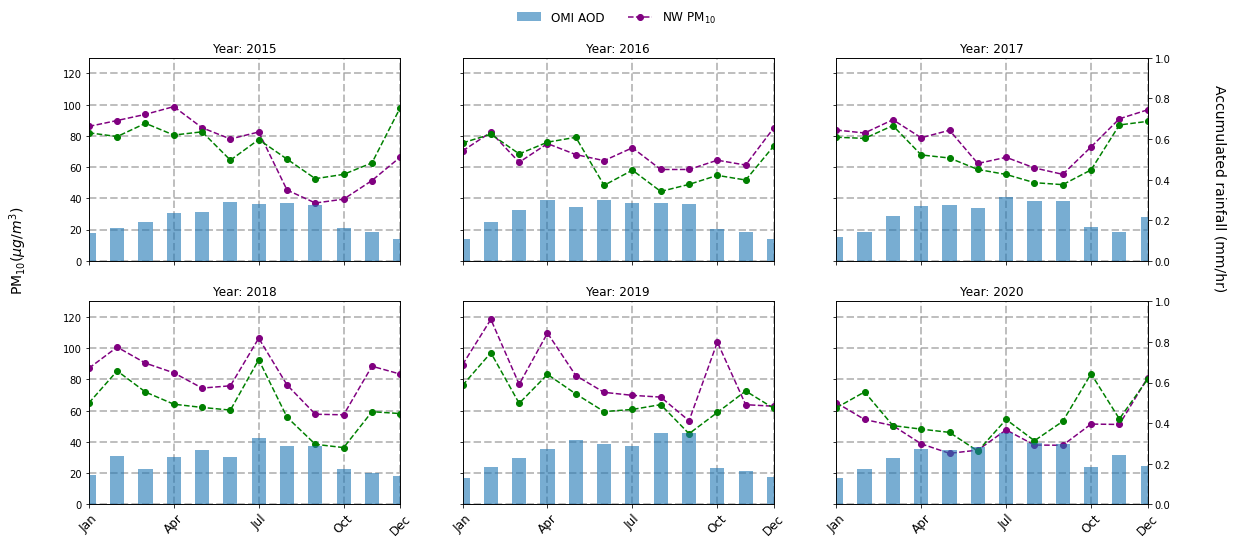

In [33]:
#RESOLUCION = 1° y WAVELENGHT = 500nm
rs=0
AOD=AOD_OMI_data(inputs['wavelen'][rs],inputs['resolution'][rs])
AOD.read_data(inputs['path data'])
AOD.calc_month_mean(inputs['year i'],inputs['year f'])

choose_months = np.arange(1, 11, 3)
choose_months = np.append(choose_months, 12)
month_names = obtain_month_names(choose_months)
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(18, 8))
plt.subplots_adjust(left=0.083, right=0.9, top=0.9)
axs = np.reshape(axs, 6)
for year, ax in zip(AOD.years, axs):
    ax2 = ax.twinx()
    ax.set_xticks(choose_months)
    ax.set_xticklabels(month_names, rotation=45, fontsize=12)
    ax.set_xlim(1, 12)
    ax.set_ylim(0, 130)
    ax.set_title("Year: {}".format(year))
    ax.grid(ls="--", color="grey", alpha=0.5, lw=2)
    # Ploteo del valor de PM10
    ax.plot(np.arange(1, 13), PM10_hour.month_mean_NO[year], ls="--", color="purple", marker="o", label="NW PM$_{10}$")
    ax.plot(np.arange(1, 13), PM10_hour.month_mean[year], ls="--", color="green", marker="o", label="NE PM$_{10}$")
    ax2.set_ylim(0, 1)
    if not ax in [axs[2], axs[5]]:
        ax2.set_yticks(([]))
    # Ploteo del valor de lluvias
    ax2.bar(np.arange(1, 13), AOD.month_mean[year], 0.5, label="OMI AOD",alpha=0.6)
fig.text(0.02, 0.5, "PM$_{10}  (\mu g/m^3)$", rotation=90, fontsize=14)
fig.text(0.95, 0.5, "Accumulated rainfall (mm/hr)", rotation=-90, fontsize=14)
lines, labels = fig.axes[-1].get_legend_handles_labels()
lines.append(fig.axes[0].get_legend_handles_labels()[0][0])
labels.append(fig.axes[0].get_legend_handles_labels()[1][0])
fig.legend(lines, labels, loc="upper center",
        ncol=5, frameon=False, fontsize=12)
plt.show()

In [26]:
PM10.cut_year('2015-01-01', '2020-01-01')
PM10_2015_2019 = PM10.section
PM10.cut_year('2020-01-01','2021-01-01')
PM10_2020 = PM10.section

PM10_2015_2019_month_mean = PM10_2015_2019.groupby(PM10_2015_2019.index.month).mean()
PM10_2020_month_mean = PM10_2020.groupby(PM10_2020.index.month).mean()

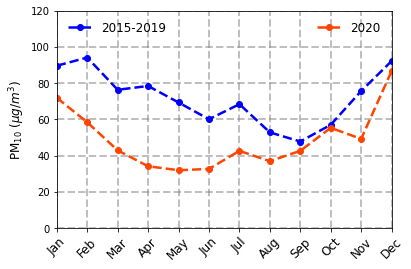

In [27]:
#NOROESTE // NORTHWEST
st=0

choose_months = np.arange(1, 13, 1)
month_names = obtain_month_names(choose_months)
plt.ylabel("PM$_{10}$ ($\mu g/m^3$)", fontsize=12)
plt.xticks(choose_months, month_names, rotation=45, fontsize=12)
plt.xlim(1, 12)
plt.ylim(0, 120)
plt.grid(ls="--", color="grey", alpha=0.5, lw=2)
plt.plot(np.arange(1, 13), list(PM10_2015_2019_month_mean[inputs['stations'][st] ]),
         ls="--", color="blue", lw=2.5, marker="o", label="2015-2019")
plt.plot(np.arange(1, 13), list(PM10_2020_month_mean[inputs['stations'][st] ]),
         ls="--", color="orangered", lw=2.5, marker="o", label="2020")
plt.legend(frameon=False, mode="expand", fontsize=12, ncol=2)

plt.show()

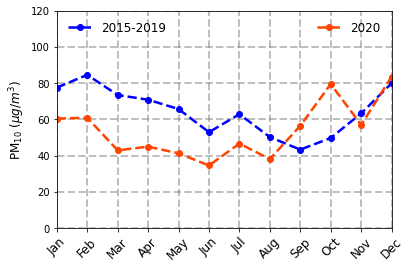

In [28]:
#NORESTE // NORHTEAST
st=1

choose_months = np.arange(1, 13, 1)
month_names = obtain_month_names(choose_months)
plt.ylabel("PM$_{10}$ ($\mu g/m^3$)", fontsize=12)
plt.xticks(choose_months, month_names, rotation=45, fontsize=12)
plt.xlim(1, 12)
plt.ylim(0, 120)
plt.grid(ls="--", color="grey", alpha=0.5, lw=2)
plt.plot(np.arange(1, 13), list(PM10_2015_2019_month_mean[inputs['stations'][st] ]),
         ls="--", color="blue", lw=2.5, marker="o", label="2015-2019")
plt.plot(np.arange(1, 13), list(PM10_2020_month_mean[inputs['stations'][st] ]),
         ls="--", color="orangered", lw=2.5, marker="o", label="2020")
plt.legend(frameon=False, mode="expand", fontsize=12, ncol=2)

plt.show()

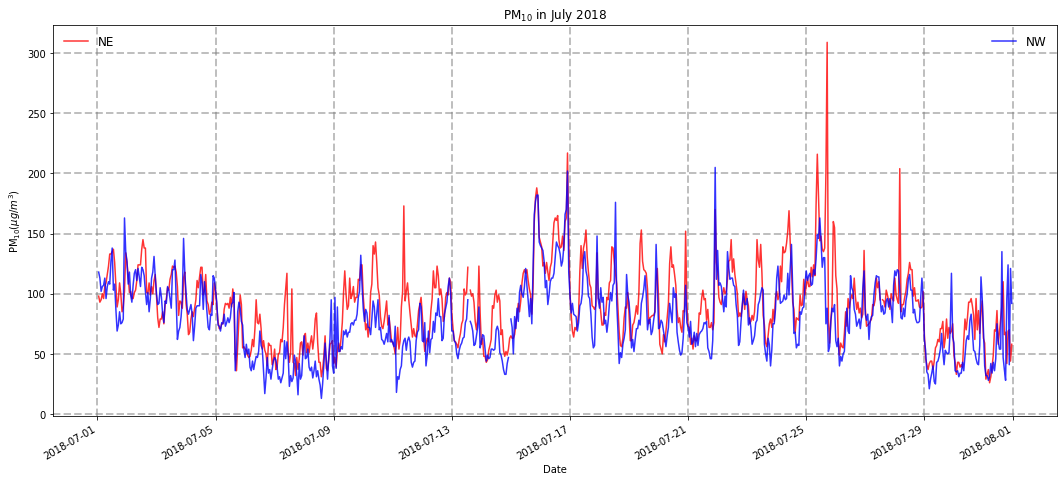

In [29]:
#JULY 2018
PM10.cut_year('2018-07-01', '2018-08-01')

fig= plt.figure(figsize=(18,8))
plt.plot_date(PM10.section.index,PM10.section[inputs['stations'][0]],"r-",markersize=6,label="NE",alpha=0.8)
plt.plot_date(PM10.section.index,PM10.section[inputs['stations'][1]],"b-",markersize=6,label="NW",alpha=0.8)
plt.grid(ls="--", color="grey", alpha=0.5, lw=2)
plt.gcf().autofmt_xdate()
plt.title('PM$_{10}$ in July 2018')
plt.xlabel('Date')
plt.ylabel('PM$_{10}  (\mu g/m^3)$')
plt.legend(frameon=False, mode="expand", fontsize=12, ncol=2)
plt.show()

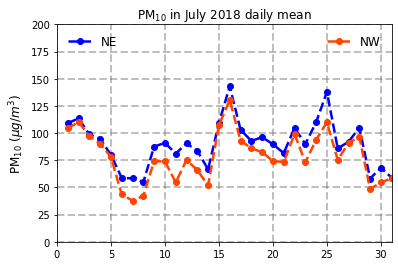

In [30]:
PM10_july_2018_mean = PM10.section.groupby(PM10.section.index.day).mean()

plt.title('PM$_{10}$ in July 2018 daily mean')
plt.ylabel("PM$_{10}$ ($\mu g/m^3$)", fontsize=12)
plt.xlim(0, 31)
plt.ylim(0, 200)
plt.grid(ls="--", color="grey", alpha=0.5, lw=2)
plt.plot(PM10_july_2018_mean.index, list(PM10_july_2018_mean[inputs['stations'][0]]),
         ls="--", color="blue", lw=2.5, marker="o", label="NE")
plt.plot(PM10_july_2018_mean.index, list(PM10_july_2018_mean[inputs['stations'][1]]),
         ls="--", color="orangered", lw=2.5, marker="o", label="NW")
plt.legend(frameon=False, mode="expand", fontsize=12, ncol=2)

plt.show()

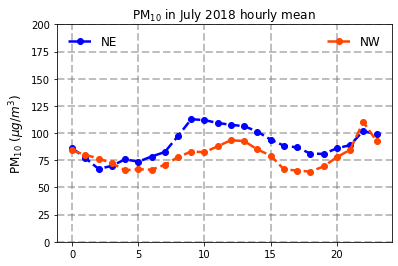

In [31]:
PM10_july_2018_hour_mean = PM10.section.groupby(PM10.section.index.hour).mean()

plt.title('PM$_{10}$ in July 2018 hourly mean')
plt.ylabel("PM$_{10}$ ($\mu g/m^3$)", fontsize=12)
#plt.xlim(0, 31)
plt.ylim(0, 200)
plt.grid(ls="--", color="grey", alpha=0.5, lw=2)
plt.plot(PM10_july_2018_hour_mean.index , list(PM10_july_2018_hour_mean[inputs['stations'][0]]),
         ls="--", color="blue", lw=2.5, marker="o", label="NE")
plt.plot(PM10_july_2018_hour_mean.index, list(PM10_july_2018_hour_mean[inputs['stations'][1]]),
         ls="--", color="orangered", lw=2.5, marker="o", label="NW")
plt.legend(frameon=False, mode="expand", fontsize=12, ncol=2)

plt.show()

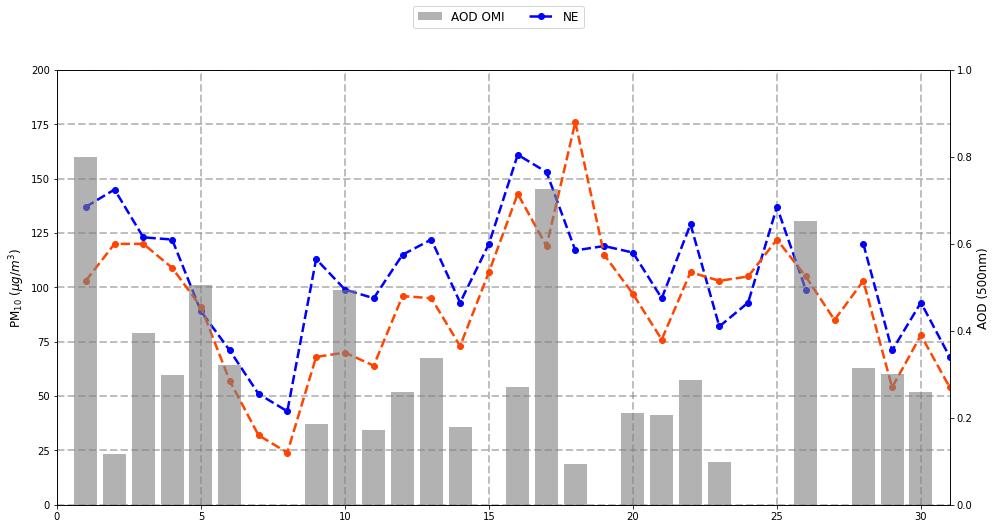

In [34]:
rs=0
AOD=AOD_OMI_data(inputs['wavelen'][rs],inputs['resolution'][rs])
AOD.read_data(inputs['path data'])
PM10_hour.cut_year('2018-07-01', '2018-08-01')
PM10_july_2018_13hour = PM10_hour.section.groupby(PM10_hour.section.index.day).mean()
AOD.cut_year('2018-07-01', '2018-08-01')

fig, ax = plt.subplots(figsize=(16,8))
ax.set_ylabel("PM$_{10}$ ($\mu g/m^3$)", fontsize=12)
ax.set_xlim(0, 31)
ax.set_ylim(0, 200)
plt.grid(ls="--", color="grey", alpha=0.5, lw=2)
ax.plot(PM10_july_2018_13hour.index, PM10_july_2018_13hour[inputs['stations'][0]],
         ls="--", color="blue", lw=2.5, marker="o", label="NE")
ax.plot(PM10_july_2018_13hour.index, PM10_july_2018_13hour[inputs['stations'][1]],
         ls="--", color="orangered", lw=2.5, marker="o", label="NW")
ax0=ax.twinx()
ax0.set_ylim(0,1)
ax0.set_ylabel("AOD (500nm)", fontsize=12)
ax0.bar(PM10_july_2018_13hour.index, list(AOD.section[inputs['wavelen'][rs]]),
          color="gray", lw=2.5, alpha=0.6, label="AOD OMI")
lines, labels = fig.axes[-1].get_legend_handles_labels()
lines.append(fig.axes[0].get_legend_handles_labels()[0][0])
labels.append(fig.axes[0].get_legend_handles_labels()[1][0])
fig.legend(lines, labels, loc="upper center",
        ncol=5, frameon=True, fontsize=12)
plt.show()

In [89]:
class grouping:

    def __init__(self,df):
        self.df=df        

    def hourly_mean_weekdays(self):
        self.mon=self.df.loc[self.df.index.weekday == 0]
        self.tue=self.df.loc[self.df.index.weekday == 1]
        self.wed=self.df.loc[self.df.index.weekday == 2]
        self.thu=self.df.loc[self.df.index.weekday == 3]
        self.fri=self.df.loc[self.df.index.weekday == 4]
        self.sat=self.df.loc[self.df.index.weekday == 5]
        self.sun=self.df.loc[self.df.index.weekday == 6]
        self.mon=self.mon.groupby(self.mon.index.hour).mean()
        self.tue=self.tue.groupby(self.tue.index.hour).mean()
        self.wed=self.wed.groupby(self.wed.index.hour).mean()
        self.thu=self.thu.groupby(self.thu.index.hour).mean()
        self.fri=self.fri.groupby(self.fri.index.hour).mean()
        self.sat=self.sat.groupby(self.sat.index.hour).mean()
        self.sun=self.sun.groupby(self.sun.index.hour).mean()

    def hourly_mean_season(self):
        spri =(self.df.index >= '2015-03-20') & (self.df.index < '2015-06-21') | (self.df.index >= '2016-03-19') & (self.df.index < '2016-06-20')|(self.df.index >= '2017-03-20') & (self.df.index < '2017-06-20')|(self.df.index >= '2018-03-20') & (self.df.index < '2018-06-21')|(self.df.index >= '2019-03-20') & (self.df.index < '2019-06-21')|(self.df.index >= '2020-03-19') & (self.df.index < '2020-06-20')
        summ = (self.df.index >= '2015-06-21') & (self.df.index < '2015-09-23') |(self.df.index >= '2016-06-20') & (self.df.index < '2016-09-22')|(self.df.index >= '2017-06-20') & (self.df.index < '2017-09-22')|(self.df.index >= '2018-06-21') & (self.df.index < '2018-09-22')|(self.df.index >= '2019-06-21') & (self.df.index < '2019-09-23')|(self.df.index >= '2020-06-20') & (self.df.index < '2020-09-22')
        autu = (self.df.index >= '2015-09-23') & (self.df.index < '2015-12-21')|(self.df.index >= '2016-09-22') & (self.df.index < '2016-12-21')|(self.df.index >= '2017-09-22') & (self.df.index < '2017-12-21')|(self.df.index >= '2018-09-22') & (self.df.index < '2018-12-21')|(self.df.index >= '2019-09-23') & (self.df.index < '2019-12-21')|(self.df.index >= '2020-09-22') & (self.df.index < '2020-12-21')
        wint = (self.df.index >= '2014-12-21') & (self.df.index < '2015-03-20')|(self.df.index >= '2015-12-21') & (self.df.index < '2016-03-19')|(self.df.index >= '2016-12-21') & (self.df.index < '2017-03-20')|(self.df.index >= '2017-12-21') & (self.df.index < '2018-03-20')|(self.df.index >= '2018-12-21') & (self.df.index < '2019-03-20')|(self.df.index >= '2019-12-21') & (self.df.index < '2020-03-19')|(self.df.index >= '2020-12-21') & (self.df.index < '2021-03-20')
        self.summer=self.df.loc[summ]
        self.autumn=self.df.loc[autu]
        self.winter=self.df.loc[wint]
        self.spring=self.df.loc[spri]
        self.spring=self.spring.groupby(self.spring.index.hour).mean()
        self.summer=self.summer.groupby(self.summer.index.hour).mean()
        self.autumn=self.autumn.groupby(self.autumn.index.hour).mean()
        self.winter=self.winter.groupby(self.winter.index.hour).mean()


#Primer caso confirmado de COVID en AMM: '2020-03-11'
#Empieza cancelación de clases y eventos: '2020-03-11??'
PM10.cut_year('2015-01-01', '2020-03-11') 
PM10_PRE_COVID = PM10.section
PM10.cut_year('2020-03-11', '2021-01-01')
PM10_COVID = PM10.section

PM10_PRE_COVID_means = grouping(PM10_PRE_COVID)
PM10_PRE_COVID_means.hourly_mean_weekdays()
PM10_COVID_means = grouping(PM10_COVID)
PM10_COVID_means.hourly_mean_weekdays()

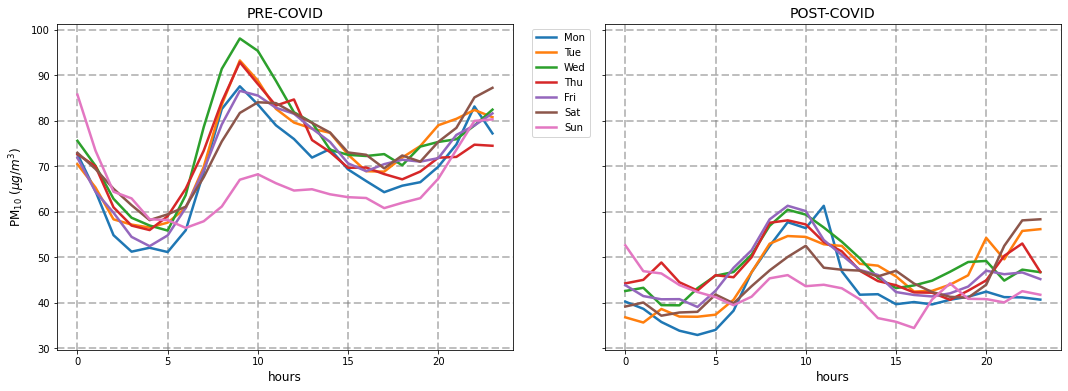

In [37]:
#NORTHEAST
st=0
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,sharex=True, figsize=(18, 6))
#fig.suptitle("HOLA")
for ax in (ax1,ax2):
    ax.set_xlabel("hours",fontsize=12)
    ax.grid(ls="--", color="grey", alpha=0.5, lw=2)
ax1.set_ylabel("PM$_{10}$ ($\mu g/m^3$)", fontsize=12)
ax1.set_title("PRE-COVID",fontsize=14)
ax1.plot(PM10_PRE_COVID_means.mon.index,PM10_PRE_COVID_means.mon[inputs['stations'][st]],label='Mon',lw=2.5)
ax1.plot(PM10_PRE_COVID_means.tue.index,PM10_PRE_COVID_means.tue[inputs['stations'][st]],label='Tue',lw=2.5)
ax1.plot(PM10_PRE_COVID_means.wed.index,PM10_PRE_COVID_means.wed[inputs['stations'][st]],label='Wed',lw=2.5)
ax1.plot(PM10_PRE_COVID_means.thu.index,PM10_PRE_COVID_means.thu[inputs['stations'][st]],label='Thu',lw=2.5)
ax1.plot(PM10_PRE_COVID_means.fri.index,PM10_PRE_COVID_means.fri[inputs['stations'][st]],label='Fri',lw=2.5)
ax1.plot(PM10_PRE_COVID_means.sat.index,PM10_PRE_COVID_means.sat[inputs['stations'][st]],label='Sat',lw=2.5)
ax1.plot(PM10_PRE_COVID_means.sun.index,PM10_PRE_COVID_means.sun[inputs['stations'][st]],label='Sun',lw=2.5)
ax2.set_title("POST-COVID",fontsize=14)
ax2.plot(PM10_COVID_means.mon.index,PM10_COVID_means.mon[inputs['stations'][st]],label='Mon',lw=2.5)
ax2.plot(PM10_COVID_means.tue.index,PM10_COVID_means.tue[inputs['stations'][st]],label='Tue',lw=2.5)
ax2.plot(PM10_COVID_means.wed.index,PM10_COVID_means.wed[inputs['stations'][st]],label='Wed',lw=2.5)
ax2.plot(PM10_COVID_means.thu.index,PM10_COVID_means.thu[inputs['stations'][st]],label='Thu',lw=2.5)
ax2.plot(PM10_COVID_means.fri.index,PM10_COVID_means.fri[inputs['stations'][st]],label='Fri',lw=2.5)
ax2.plot(PM10_COVID_means.sat.index,PM10_COVID_means.sat[inputs['stations'][st]],label='Sat',lw=2.5)
ax2.plot(PM10_COVID_means.sun.index,PM10_COVID_means.sun[inputs['stations'][st]],label='Sun',lw=2.5)
ax1.legend(bbox_to_anchor=(1.03, 1))
plt.show()

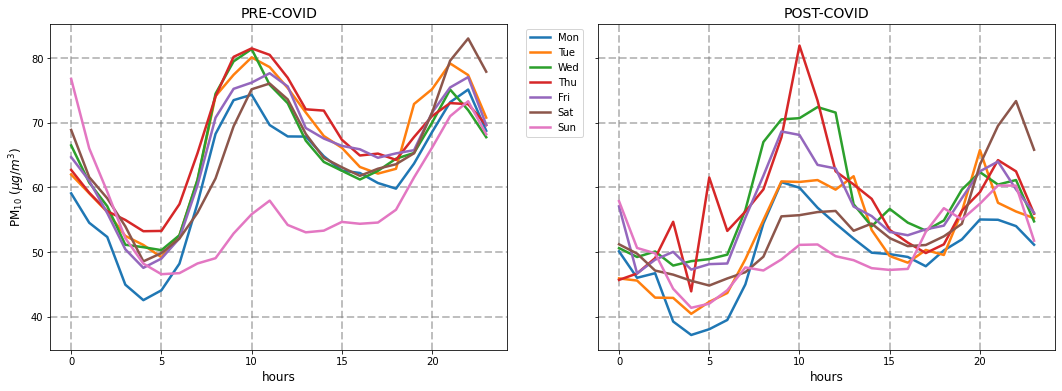

In [38]:
#NORTHWEST
st=1
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,sharex=True, figsize=(18, 6))
#fig.suptitle("HOLA")
for ax in (ax1,ax2):
    ax.set_xlabel("hours",fontsize=12)
    ax.grid(ls="--", color="grey", alpha=0.5, lw=2)
ax1.set_ylabel("PM$_{10}$ ($\mu g/m^3$)", fontsize=12)
ax1.set_title("PRE-COVID",fontsize=14)
ax1.plot(PM10_PRE_COVID_means.mon.index,PM10_PRE_COVID_means.mon[inputs['stations'][st]],label='Mon',lw=2.5)
ax1.plot(PM10_PRE_COVID_means.tue.index,PM10_PRE_COVID_means.tue[inputs['stations'][st]],label='Tue',lw=2.5)
ax1.plot(PM10_PRE_COVID_means.wed.index,PM10_PRE_COVID_means.wed[inputs['stations'][st]],label='Wed',lw=2.5)
ax1.plot(PM10_PRE_COVID_means.thu.index,PM10_PRE_COVID_means.thu[inputs['stations'][st]],label='Thu',lw=2.5)
ax1.plot(PM10_PRE_COVID_means.fri.index,PM10_PRE_COVID_means.fri[inputs['stations'][st]],label='Fri',lw=2.5)
ax1.plot(PM10_PRE_COVID_means.sat.index,PM10_PRE_COVID_means.sat[inputs['stations'][st]],label='Sat',lw=2.5)
ax1.plot(PM10_PRE_COVID_means.sun.index,PM10_PRE_COVID_means.sun[inputs['stations'][st]],label='Sun',lw=2.5)
ax2.set_title("POST-COVID",fontsize=14)
ax2.plot(PM10_COVID_means.mon.index,PM10_COVID_means.mon[inputs['stations'][st]],label='Mon',lw=2.5)
ax2.plot(PM10_COVID_means.tue.index,PM10_COVID_means.tue[inputs['stations'][st]],label='Tue',lw=2.5)
ax2.plot(PM10_COVID_means.wed.index,PM10_COVID_means.wed[inputs['stations'][st]],label='Wed',lw=2.5)
ax2.plot(PM10_COVID_means.thu.index,PM10_COVID_means.thu[inputs['stations'][st]],label='Thu',lw=2.5)
ax2.plot(PM10_COVID_means.fri.index,PM10_COVID_means.fri[inputs['stations'][st]],label='Fri',lw=2.5)
ax2.plot(PM10_COVID_means.sat.index,PM10_COVID_means.sat[inputs['stations'][st]],label='Sat',lw=2.5)
ax2.plot(PM10_COVID_means.sun.index,PM10_COVID_means.sun[inputs['stations'][st]],label='Sun',lw=2.5)
ax1.legend(bbox_to_anchor=(1.03, 1))
plt.show()

In [92]:
PM10_PRE_COVID_means.hourly_mean_season()
PM10_COVID_means.hourly_mean_season()


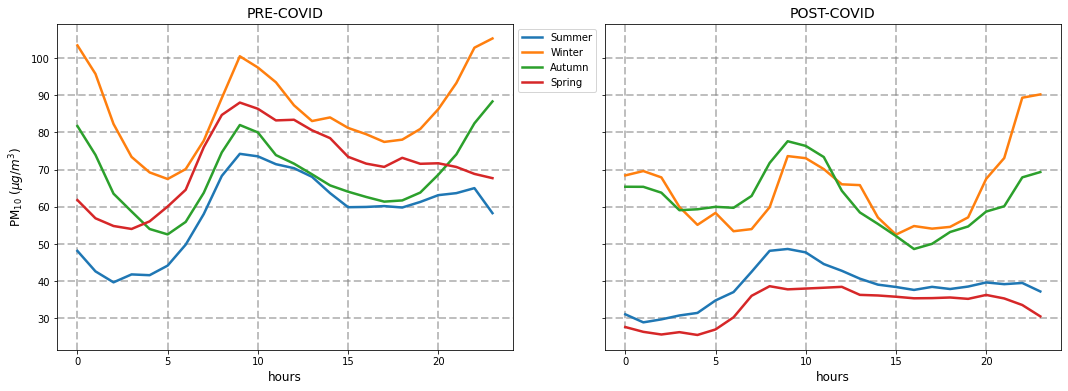

In [99]:
#NORTHEAST
st=0
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,sharex=True, figsize=(18, 6))
#fig.suptitle("HOLA")
for ax in (ax1,ax2):
    ax.set_xlabel("hours",fontsize=12)
    ax.grid(ls="--", color="grey", alpha=0.5, lw=2)
ax1.set_ylabel("PM$_{10}$ ($\mu g/m^3$)", fontsize=12)
ax1.set_title("PRE-COVID",fontsize=14)
ax1.plot(PM10_PRE_COVID_means.summer.index,PM10_PRE_COVID_means.summer[inputs['stations'][st]],label='Summer',lw=2.5)
ax1.plot(PM10_PRE_COVID_means.winter.index,PM10_PRE_COVID_means.winter[inputs['stations'][st]],label='Winter',lw=2.5)
ax1.plot(PM10_PRE_COVID_means.autumn.index,PM10_PRE_COVID_means.autumn[inputs['stations'][st]],label='Autumn',lw=2.5)
ax1.plot(PM10_PRE_COVID_means.spring.index,PM10_PRE_COVID_means.spring[inputs['stations'][st]],label='Spring',lw=2.5)
ax2.set_title("POST-COVID",fontsize=14)
ax2.plot(PM10_COVID_means.summer.index,PM10_COVID_means.summer[inputs['stations'][st]],label='Summer',lw=2.5)
ax2.plot(PM10_COVID_means.winter.index,PM10_COVID_means.winter[inputs['stations'][st]],label='Winter',lw=2.5)
ax2.plot(PM10_COVID_means.autumn.index,PM10_COVID_means.autumn[inputs['stations'][st]],label='Autumn',lw=2.5)
ax2.plot(PM10_COVID_means.spring.index,PM10_COVID_means.spring[inputs['stations'][st]],label='Spring',lw=2.5)
ax1.legend(bbox_to_anchor=(1, 1))
plt.show()

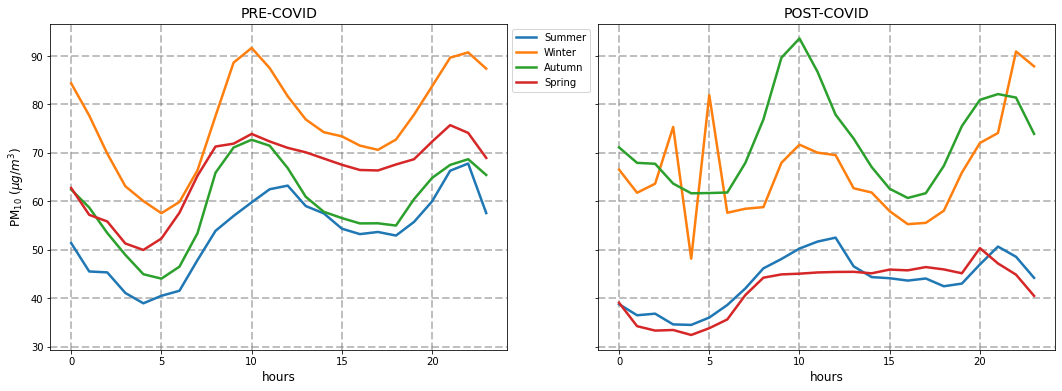

In [100]:
#NORTHEAST
st=1
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,sharex=True, figsize=(18, 6))
#fig.suptitle("HOLA")
for ax in (ax1,ax2):
    ax.set_xlabel("hours",fontsize=12)
    ax.grid(ls="--", color="grey", alpha=0.5, lw=2)
ax1.set_ylabel("PM$_{10}$ ($\mu g/m^3$)", fontsize=12)
ax1.set_title("PRE-COVID",fontsize=14)
ax1.plot(PM10_PRE_COVID_means.summer.index,PM10_PRE_COVID_means.summer[inputs['stations'][st]],label='Summer',lw=2.5)
ax1.plot(PM10_PRE_COVID_means.winter.index,PM10_PRE_COVID_means.winter[inputs['stations'][st]],label='Winter',lw=2.5)
ax1.plot(PM10_PRE_COVID_means.autumn.index,PM10_PRE_COVID_means.autumn[inputs['stations'][st]],label='Autumn',lw=2.5)
ax1.plot(PM10_PRE_COVID_means.spring.index,PM10_PRE_COVID_means.spring[inputs['stations'][st]],label='Spring',lw=2.5)
ax2.set_title("POST-COVID",fontsize=14)
ax2.plot(PM10_COVID_means.summer.index,PM10_COVID_means.summer[inputs['stations'][st]],label='Summer',lw=2.5)
ax2.plot(PM10_COVID_means.winter.index,PM10_COVID_means.winter[inputs['stations'][st]],label='Winter',lw=2.5)
ax2.plot(PM10_COVID_means.autumn.index,PM10_COVID_means.autumn[inputs['stations'][st]],label='Autumn',lw=2.5)
ax2.plot(PM10_COVID_means.spring.index,PM10_COVID_means.spring[inputs['stations'][st]],label='Spring',lw=2.5)
ax1.legend(bbox_to_anchor=(1, 1))
plt.show()

In [125]:
from sklearn.linear_model import LinearRegression
rs=0
AOD=AOD_OMI_data(inputs['wavelen'][rs],inputs['resolution'][rs])
AOD.read_data(inputs['path data'])
PM10_hour=SIMA_data(inputs['stations'],'PM10_hour')
PM10_hour.read_data_SIMA(inputs['path data'])
PM10_hour.clean_data()

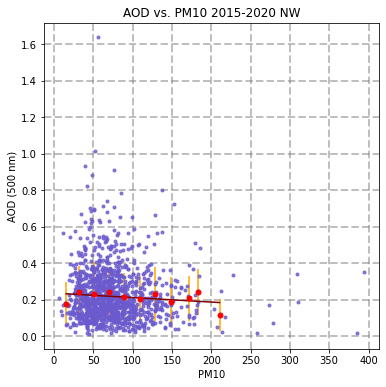

R^2: 0.17446891942575682


In [180]:
#NORTHWEST
st=0
df = {'PM10':PM10_hour.data[inputs['stations'][st]],'AOD':AOD.data[inputs['wavelen'][rs]]}
AOD_PM10 = pd.DataFrame(df).resample("D").mean().dropna().sort_values("PM10")

bins=[n for n in range(0,220+1,20)]
AOD_PM10_bins=AOD_PM10.groupby(pd.cut(AOD_PM10['PM10'],bins)).mean()
AOD_PM10_error=AOD_PM10.groupby(pd.cut(AOD_PM10['PM10'],bins)).std()

X=AOD_PM10_bins["PM10"].values.reshape(-1, 1)
Y=AOD_PM10_bins["AOD"].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
r_sqd=linear_regressor.score(X,Y)

#PLOT
fig= plt.figure(figsize=(6,6))
plt.grid(ls="--", color="grey", alpha=0.5, lw=2)
plt.plot(AOD_PM10["PM10"],AOD_PM10["AOD"],"g.",markersize=6,alpha=0.8,color="slateblue")
plt.plot(X, Y_pred, color='maroon')
plt.plot(X,Y,"r.",markersize=10,color='red')
plt.errorbar(X,Y,AOD_PM10_error["AOD"],linestyle="None",lw=1.5,color="orange")
#plt.axis([0, 70, 0, 0.9])
plt.title('AOD vs. PM10 2015-2020 NW')
plt.ylabel('AOD (500 nm)')
plt.xlabel('PM10')
plt.show()
print("R^2:",r_sqd)

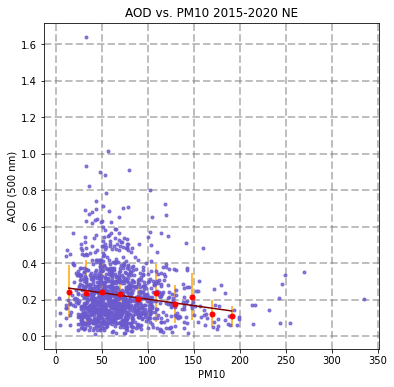

R^2: 0.7062450730013926


In [181]:
#NORTHEAST
st=1
df = {'PM10':PM10_hour.data[inputs['stations'][st]],'AOD':AOD.data[inputs['wavelen'][rs]]}
AOD_PM10 = pd.DataFrame(df).resample("D").mean().dropna().sort_values("PM10")

bins=[n for n in range(0,200+1,20)]
AOD_PM10_bins=AOD_PM10.groupby(pd.cut(AOD_PM10['PM10'],bins)).mean()
AOD_PM10_error=AOD_PM10.groupby(pd.cut(AOD_PM10['PM10'],bins)).std()

X=AOD_PM10_bins["PM10"].values.reshape(-1, 1)
Y=AOD_PM10_bins["AOD"].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
r_sqd=linear_regressor.score(X,Y)

#PLOT
fig= plt.figure(figsize=(6,6))
plt.grid(ls="--", color="grey", alpha=0.5, lw=2)
plt.plot(AOD_PM10["PM10"],AOD_PM10["AOD"],"g.",markersize=6,alpha=0.8,color="slateblue")
plt.plot(X, Y_pred, color='maroon')
plt.plot(X,Y,"r.",markersize=10,color='red')
plt.errorbar(X,Y,AOD_PM10_error["AOD"],linestyle="None",lw=1.5,color="orange")
#plt.axis([0, 70, 0, 0.9])
plt.title('AOD vs. PM10 2015-2020 NE')
plt.ylabel('AOD (500 nm)')
plt.xlabel('PM10')
plt.show()
print("R^2:",r_sqd)